<a href="https://colab.research.google.com/github/MohammedEsamaldin/abtest-mlops/blob/main/EDA_Notebooks/AB_testing_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AdSmartABdata.csv',na_values= ['?',None])
df.isnull().sum().head(10)


auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [5]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
print(df.shape)

(8077, 9)


In [8]:
df.describe(include=["object", "bool"])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [9]:
def value_func(x:str):
  data= df[x].value_counts()
  return data

In [10]:
value_func('device_make').head(20)

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
Samsung SM-G930F        100
Samsung SM-G975F         97
Samsung SM-A202F         88
Samsung SM-A405FN        87
Samsung SM-J330FN        69
Samsung SM-G965F         66
Samsung SM-A105FN        66
Nokia$2$3                64
Samsung SM-G935F         63
Nokia undefined$2$3      60
Samsung SM-G970F         58
Samsung SM-A705FN        56
Samsung SM-A505FN        53
Samsung SM-A520F         51
Samsung SM-G920F         48
Name: device_make, dtype: int64

In [11]:
value_func('browser')

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [12]:
agg_data = df.groupby(['experiment']).agg({'device_make':'count','browser':'count','yes':'count', 'no':'count'})
agg_data

,device_make,browser,yes,no
experiment,,,,
control,4071,4071,4071,4071
exposed,4006,4006,4006,4006


In [13]:
df.head()
ex_co = df['experiment'].value_counts()

ex_co

control    4071
exposed    4006
Name: experiment, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import os, sys
import datetime
import seaborn as sns
from scipy.stats import chi2_contingency, beta
import plotly.graph_objs as go
#from plot import Plo

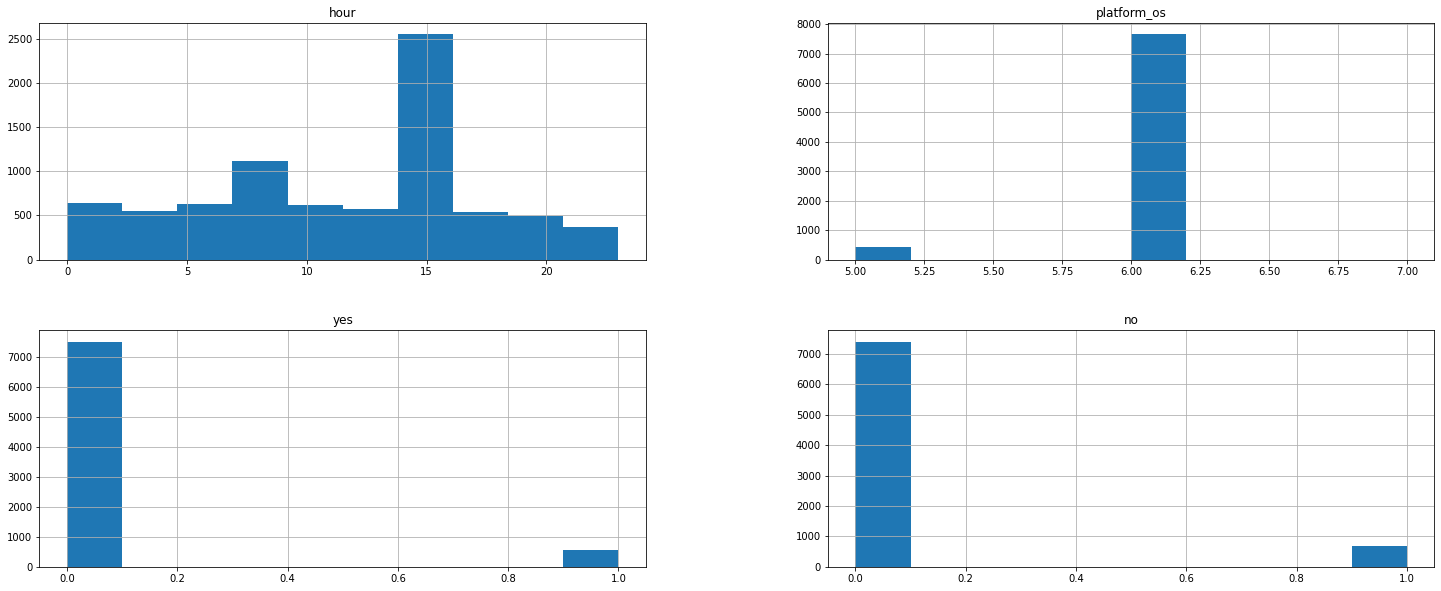

In [22]:
df.hist(bins=10, figsize=(25, 10))
plt.show()

**`Calculating p_values`**

In [23]:
def delete_users(data):
    cleand_df = data.query("not(yes==0 & no==0)")
    return cleand_df

clean_df = delete_users(df)

In [24]:
clean_df.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,yes,no
experiment,,,,,,,,
control,586,586,586,586,586,586,586,586
exposed,657,657,657,657,657,657,657,657


In [26]:
# number of user completed the survey with a 'yes' or 'no'
df_yes = df[(df['experiment'] == 'exposed') & (df['yes']==1)].shape[0]
df_no = df[(df['experiment'] == 'exposed') & (df['no']==1)].shape[0]
#plot the count of the column with yes
plot_count(df.yes, df.experiment)

NameError: ignored